In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
#import statsmodels.api as sm

# Новый раздел

In [2]:
df_receivable = pd.read_excel('/content/Данные проект v2.xlsx')
#df.dropna(inplace=True)
df_receivable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   НомерДокумента          247 non-null    object        
 1   ФактическаяДатаПлатежа  247 non-null    datetime64[ns]
 2   ДатаПлатежаПоДоговору   247 non-null    datetime64[ns]
 3   Сумма                   247 non-null    float64       
 4   Контрагент              247 non-null    int64         
 5   Просрочка               247 non-null    int64         
 6   ОКВЭД                   247 non-null    object        
 7   ГруппаОКВЭД             247 non-null    object        
 8   ГодРегистрацииК/а       247 non-null    int64         
 9   ГруппаКомпаний          247 non-null    object        
 10  ДниПросрочки            247 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 21.4+ KB


In [3]:
df_receivable.head(3)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,ДниПросрочки
0,Документ расчетов с контрагентом МТ00-00000000...,2022-03-11,2022-03-31,5175.84,1,0,0,н/д,0,нет,19
1,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-03-16,2022-03-31,17569.40,2,0,73.11,Реклама,2017,нет,14
2,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-04-13,2022-04-30,62889.16,2,0,73.11,Реклама,2017,нет,16


In [4]:
df_receivable['ФактическаяДатаПлатежа']= pd.to_datetime(df_receivable.ФактическаяДатаПлатежа)

In [5]:
df_receivable.drop(columns = ['ДниПросрочки'],axis = 1, inplace=True)

In [6]:
df_receivable.head(3)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний
0,Документ расчетов с контрагентом МТ00-00000000...,2022-03-11,2022-03-31,5175.84,1,0,0,н/д,0,нет
1,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-03-16,2022-03-31,17569.40,2,0,73.11,Реклама,2017,нет
2,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-04-13,2022-04-30,62889.16,2,0,73.11,Реклама,2017,нет


In [7]:
df_receivable['countlate']=df_receivable.Просрочка.eq(1).groupby(df_receivable.Контрагент).apply(
    lambda x : x.cumsum().shift().fillna(0)).astype(int)

In [8]:
df_receivable.head(3)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,countlate
0,Документ расчетов с контрагентом МТ00-00000000...,2022-03-11,2022-03-31,5175.84,1,0,0,н/д,0,нет,0
1,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-03-16,2022-03-31,17569.40,2,0,73.11,Реклама,2017,нет,0
2,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-04-13,2022-04-30,62889.16,2,0,73.11,Реклама,2017,нет,0


In [9]:
df_receivable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   НомерДокумента          247 non-null    object        
 1   ФактическаяДатаПлатежа  247 non-null    datetime64[ns]
 2   ДатаПлатежаПоДоговору   247 non-null    datetime64[ns]
 3   Сумма                   247 non-null    float64       
 4   Контрагент              247 non-null    int64         
 5   Просрочка               247 non-null    int64         
 6   ОКВЭД                   247 non-null    object        
 7   ГруппаОКВЭД             247 non-null    object        
 8   ГодРегистрацииК/а       247 non-null    int64         
 9   ГруппаКомпаний          247 non-null    object        
 10  countlate               247 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 21.4+ KB


In [10]:
df_receivable.describe()

,Сумма,Контрагент,Просрочка,ГодРегистрацииК/а,countlate
count,2.470000e+02,247.000000,247.000000,247.000000,247.000000
mean,1.143095e+06,22.623482,0.607287,1976.692308,3.170040
std,4.306918e+06,13.883368,0.489345,254.204359,4.281202
min,3.000000e-02,1.000000,0.000000,0.000000,0.000000
25%,1.334091e+04,10.500000,0.000000,2004.000000,0.000000
50%,6.877584e+04,21.000000,1.000000,2007.000000,1.000000
75%,3.480000e+05,30.000000,1.000000,2015.000000,4.000000
max,3.038019e+07,57.000000,1.000000,2021.000000,18.000000


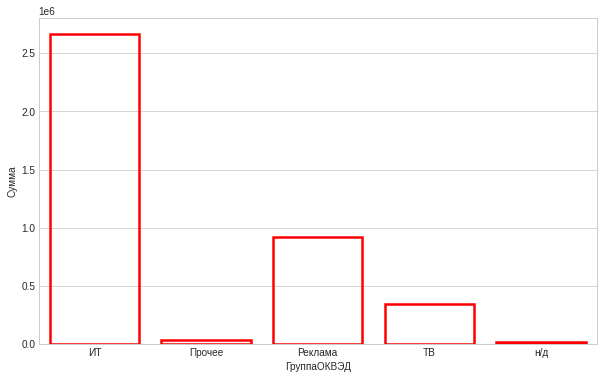

In [11]:
temp = pd.DataFrame(df_receivable.groupby(['ГруппаОКВЭД'], axis=0, as_index=False)['Сумма'].mean())
plt.figure(figsize=(10,6))
sns.barplot(x="ГруппаОКВЭД", y="Сумма",data=temp,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".4", edgecolor="red")

In [12]:
df_receivable.describe(include=np.object)

<ipython-input-12-ec5b9d9922b9>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_receivable.describe(include=np.object)


,НомерДокумента,ОКВЭД,ГруппаОКВЭД,ГруппаКомпаний
count,247,247,247,247
unique,242,23,5,2
top,Документ расчетов с контрагентом МТ00-00000000...,73.11,Реклама,нет
freq,2,91,105,161


In [13]:
print(pd.crosstab(index=df_receivable["ОКВЭД"], columns="count"))
print(pd.crosstab(index=df_receivable["ГруппаКомпаний"], columns="count"))
print(pd.crosstab(index=df_receivable["Просрочка"], columns="count"))

col_0    count
ОКВЭД         
0            7
45.20.1      1
47.19       19
47.52        1
47.91.2      2
53.20.3      1
59.20.1      1
60.20       23
62.01       16
62.02        6
62.09        2
63.11       32
63.11.1     10
63.99.1      3
68.20.2      4
68.31        5
70.21        3
72.19        3
73.1        14
73.11       91
82.30        1
82.99        1
93.19        1
col_0           count
ГруппаКомпаний       
да                 86
нет               161
col_0      count
Просрочка       
0             97
1            150


In [14]:
df_receivable.head(3)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,countlate
0,Документ расчетов с контрагентом МТ00-00000000...,2022-03-11,2022-03-31,5175.84,1,0,0,н/д,0,нет,0
1,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-03-16,2022-03-31,17569.40,2,0,73.11,Реклама,2017,нет,0
2,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-04-13,2022-04-30,62889.16,2,0,73.11,Реклама,2017,нет,0


In [15]:
customer_late =pd.crosstab(index=df_receivable["Контрагент"], columns=df_receivable['Просрочка'])
customer_late.sort_values(by=[1], ascending = False)

Просрочка,0,1
Контрагент,,
5,4,19
21,13,18
27,6,13
30,1,11
10,7,9
23,0,8
53,0,5
18,0,4
14,0,4


In [16]:
df1 = df_receivable[df_receivable['Сумма']>0].copy()

In [17]:
df2 = pd.DataFrame(df1.groupby(['Контрагент'], axis=0, as_index=False)['Сумма'].count())
df2.columns = (['Контрагент','repeatCust'])
df3 = pd.merge(df_receivable, df2, how='left', on='Контрагент')
df3['repeatCust'].fillna(0, inplace=True)

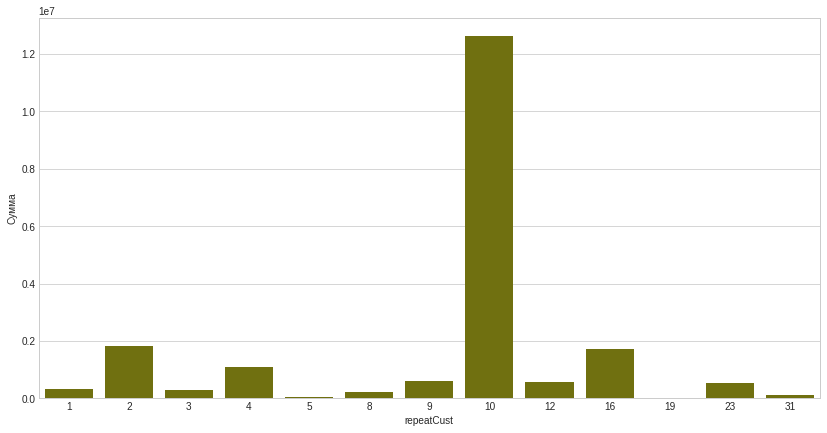

In [18]:
df_receivable = df3
temp = pd.DataFrame(df_receivable.groupby(['repeatCust'], axis=0, as_index=False)['Сумма'].mean())
plt.figure(figsize=(14,7))
sns.barplot(x="repeatCust", y="Сумма",data=temp,color='olive')

In [19]:
def func_IA (x):
    if x>60: return "b. more than 60"
    else: return "a. less than 60"
df_receivable['Сумма_bin'] = df_receivable['Сумма'].apply(func_IA)

In [20]:
df_receivable.head(3)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,countlate,repeatCust,Сумма_bin
0,Документ расчетов с контрагентом МТ00-00000000...,2022-03-11,2022-03-31,5175.84,1,0,0,н/д,0,нет,0,2,b. more than 60
1,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-03-16,2022-03-31,17569.40,2,0,73.11,Реклама,2017,нет,0,5,b. more than 60
2,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-04-13,2022-04-30,62889.16,2,0,73.11,Реклама,2017,нет,0,5,b. more than 60


In [21]:
temp = pd.DataFrame(df_receivable.groupby(['Сумма_bin'], axis=0, as_index=False)['Сумма'].mean())

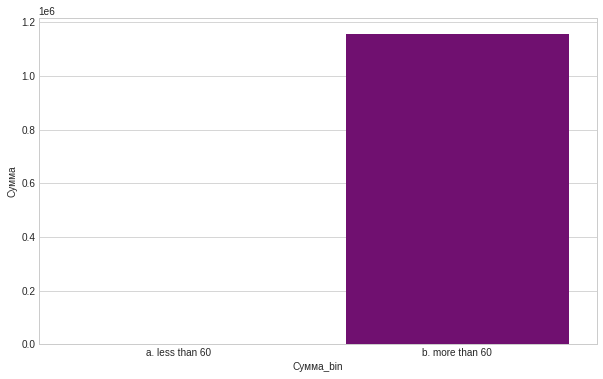

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x="Сумма_bin", y="Сумма",data=temp,color='purple')

In [23]:
df_receivable['ГруппаОКВЭД'] = df_receivable['ГруппаОКВЭД'].map({'н/д':0,'Реклама':1,'ИТ':2,'ТВ':3,'Прочее':4})
df_receivable['ГруппаКомпаний'] = df_receivable['ГруппаКомпаний'].map({'нет': 0,'да': 1})

In [24]:
df_receivable['InvoiceQuarter']= pd.to_datetime(df_receivable['ФактическаяДатаПлатежа']).dt.quarter

In [25]:
df_receivable.head(5)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,countlate,repeatCust,Сумма_bin,InvoiceQuarter
0,Документ расчетов с контрагентом МТ00-00000000...,2022-03-11,2022-03-31,5175.84,1,0,0,0,0,0,0,2,b. more than 60,1
1,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-03-16,2022-03-31,17569.40,2,0,73.11,1,2017,0,0,5,b. more than 60,1
2,"Реализация (акт, накладная, УПД) МТ00-00000000...",2022-04-13,2022-04-30,62889.16,2,0,73.11,1,2017,0,0,5,b. more than 60,2
3,"Реализация (акт, накладная, УПД) МТ00-00000001...",2022-05-11,2022-05-31,198885.74,2,0,73.11,1,2017,0,0,5,b. more than 60,2
4,"Реализация (акт, накладная, УПД) МТ00-00000001...",2022-06-09,2022-06-30,96746.69,2,0,73.11,1,2017,0,0,5,b. more than 60,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


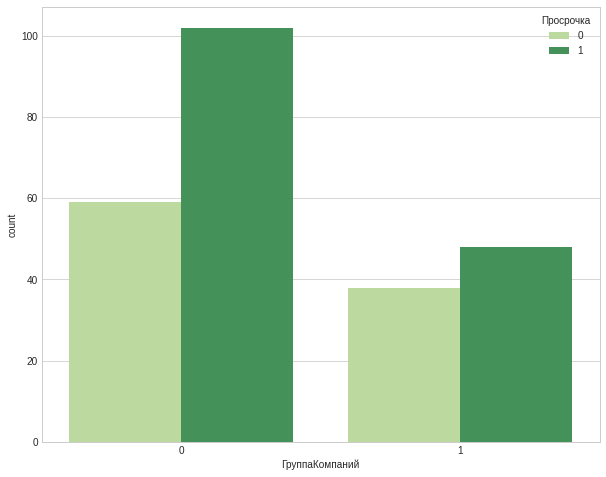

In [26]:
plt.figure(figsize=(10,8))

ax = sns.countplot(df_receivable['ГруппаКомпаний'],hue=df_receivable['Просрочка'],palette="YlGn")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


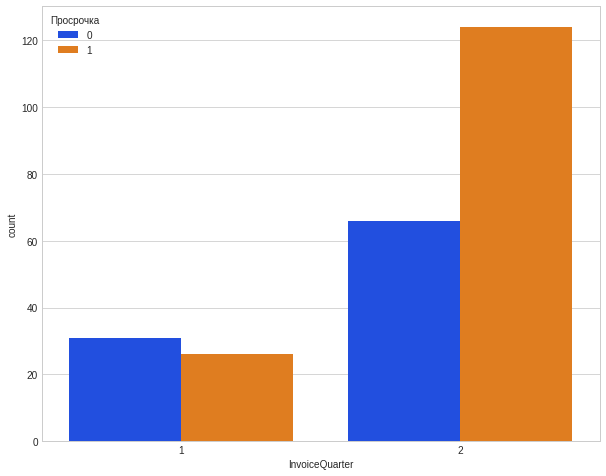

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(df_receivable['InvoiceQuarter'],hue=df_receivable['Просрочка'],palette='bright')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


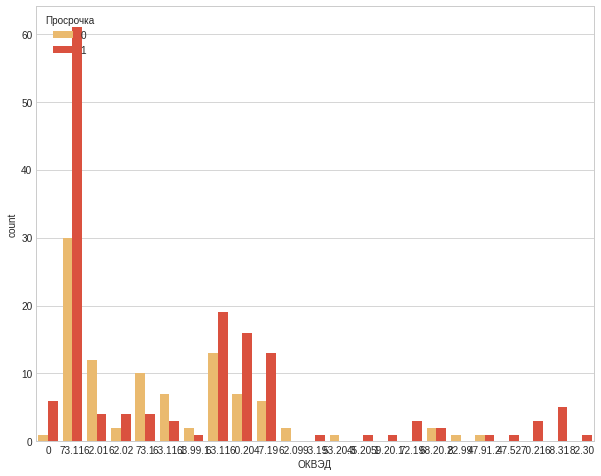

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(df_receivable['ОКВЭД'],hue=df_receivable['Просрочка'],palette='YlOrRd')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


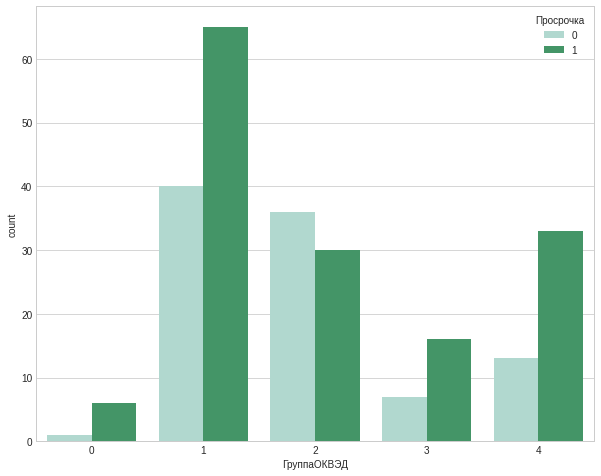

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(df_receivable['ГруппаОКВЭД'],hue=df_receivable['Просрочка'],palette='BuGn')

In [30]:
labels = df_receivable['НомерДокумента'].astype('category').cat.categories.tolist()

In [31]:
labels1 = df_receivable['ОКВЭД'].astype('category').cat.categories.tolist()

In [32]:
replace_map_comp = {'НомерДокумента' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [33]:
replace_map_comp1 = {'ОКВЭД' : {k: v for k,v in zip(labels1,list(range(1,len(labels)+1)))}}

In [34]:
df_receivable.replace(replace_map_comp, inplace=True)

In [35]:
df_receivable.replace(replace_map_comp1, inplace=True)

In [36]:
df_receivable.head(3)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,countlate,repeatCust,Сумма_bin,InvoiceQuarter
0,90,2022-03-11,2022-03-31,5175.84,1,0,1,0,0,0,0,2,b. more than 60,1
1,110,2022-03-16,2022-03-31,17569.40,2,0,20,1,2017,0,0,5,b. more than 60,1
2,151,2022-04-13,2022-04-30,62889.16,2,0,20,1,2017,0,0,5,b. more than 60,2


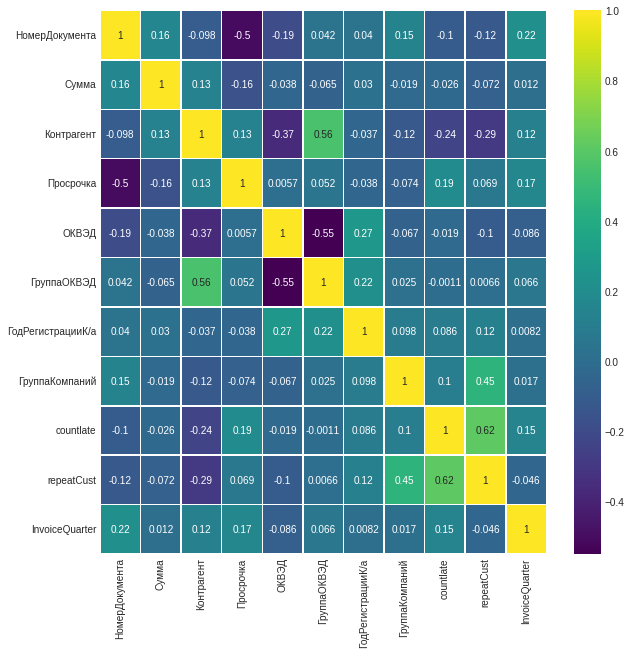

In [37]:
corremat = df_receivable.corr()
plt.figure(figsize=(10,10))
g= sns.heatmap(df_receivable.corr(),annot=True,cmap='viridis',linewidths=.5)

In [38]:
corremat

,НомерДокумента,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,countlate,repeatCust,InvoiceQuarter
НомерДокумента,1.000000,0.159647,-0.098237,-0.503615,-0.193494,0.042211,0.040243,0.145734,-0.103286,-0.122495,0.221247
Сумма,0.159647,1.000000,0.129393,-0.160876,-0.037845,-0.064967,0.030171,-0.019355,-0.025545,-0.071529,0.012267
Контрагент,-0.098237,0.129393,1.000000,0.134914,-0.365092,0.555323,-0.037258,-0.124281,-0.235896,-0.289832,0.118275
Просрочка,-0.503615,-0.160876,0.134914,1.000000,0.005664,0.052500,-0.038360,-0.073554,0.193055,0.068818,0.169522
ОКВЭД,-0.193494,-0.037845,-0.365092,0.005664,1.000000,-0.549369,0.268385,-0.066543,-0.019302,-0.103423,-0.086390
ГруппаОКВЭД,0.042211,-0.064967,0.555323,0.052500,-0.549369,1.000000,0.220809,0.024577,-0.001066,0.006587,0.066158
ГодРегистрацииК/а,0.040243,0.030171,-0.037258,-0.038360,0.268385,0.220809,1.000000,0.097532,0.086250,0.118822,0.008161
ГруппаКомпаний,0.145734,-0.019355,-0.124281,-0.073554,-0.066543,0.024577,0.097532,1.000000,0.102192,0.450154,0.017067
countlate,-0.103286,-0.025545,-0.235896,0.193055,-0.019302,-0.001066,0.086250,0.102192,1.000000,0.616513,0.149995
repeatCust,-0.122495,-0.071529,-0.289832,0.068818,-0.103423,0.006587,0.118822,0.450154,0.616513,1.000000,-0.045854


In [39]:
corremat.columns

Index(['НомерДокумента', 'Сумма', 'Контрагент', 'Просрочка', 'ОКВЭД',
       'ГруппаОКВЭД', 'ГодРегистрацииК/а', 'ГруппаКомпаний', 'countlate',
       'repeatCust', 'InvoiceQuarter'],
      dtype='object')

In [40]:
cat_feats = ['Сумма_bin']
final_data = pd.get_dummies(df_receivable,columns=cat_feats,drop_first=True)

In [41]:
final_data.head(3)

,НомерДокумента,ФактическаяДатаПлатежа,ДатаПлатежаПоДоговору,Сумма,Контрагент,Просрочка,ОКВЭД,ГруппаОКВЭД,ГодРегистрацииК/а,ГруппаКомпаний,countlate,repeatCust,InvoiceQuarter,Сумма_bin_b. more than 60
0,90,2022-03-11,2022-03-31,5175.84,1,0,1,0,0,0,0,2,1,1
1,110,2022-03-16,2022-03-31,17569.40,2,0,20,1,2017,0,0,5,1,1
2,151,2022-04-13,2022-04-30,62889.16,2,0,20,1,2017,0,0,5,2,1


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np


In [43]:
features=['ГруппаКомпаний', 'Контрагент', 'Сумма', "InvoiceQuarter",
       'ГруппаОКВЭД', 'ОКВЭД','repeatCust', 'countlate']

In [44]:
features

['ГруппаКомпаний',
 'Контрагент',
 'Сумма',
 'InvoiceQuarter',
 'ГруппаОКВЭД',
 'ОКВЭД',
 'repeatCust',
 'countlate']

In [45]:
X = final_data[features]
y = final_data['Просрочка']

In [46]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Просрочка, dtype: int64

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [48]:
scaler = StandardScaler()

In [49]:
x_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [50]:
x_norm.head()

,ГруппаКомпаний,Контрагент,Сумма,InvoiceQuarter,ГруппаОКВЭД,ОКВЭД,repeatCust,countlate
0,-0.701381,-1.175016,-0.257444,0.566947,-0.831024,0.925279,-0.982932,-0.769260
1,-0.701381,1.177713,-0.245215,-1.763834,0.004516,-0.886986,-0.982932,-0.769260
2,-0.701381,-0.462067,-0.256183,0.566947,-0.831024,0.925279,-0.779187,-0.769260
3,-0.701381,1.106418,-0.254210,0.566947,1.675597,0.101522,-0.779187,-0.769260
4,-0.701381,0.036996,-0.227626,0.566947,-0.831024,0.925279,-0.371697,0.090638


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [52]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [53]:
lr_accuracy = round(lr.score(X_train,y_train)*100,2)
print(round(lr_accuracy,2),'%')

37.3 %


In [54]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.45161290322580644
0.0
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', learning_rate='constant', eta0=0.1, random_state=13)

In [56]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [57]:
clf_accuracy = round(clf.score(X_train,y_train)*100,2)
print(round(clf_accuracy,2),'%')

62.7 %


In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5483870967741935

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 0, 28],
       [ 0, 34]])

In [ ]:
precision_score(y_test, y_pred)

0.5483870967741935

In [ ]:
recall_score(y_test, y_pred)

1.0

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rnd = RandomForestClassifier(random_state=42)
rnd.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
rnd_accuracy = round(rnd.score(X_test,y_test)*100,2)
print(round(rnd_accuracy,2),'%')

67.74 %


In [66]:
accuracy_score(y_test, y_pred)

0.5483870967741935

In [63]:
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[ 0 28]
 [ 0 34]]
0.5483870967741935
1.0
0.5
